In this Coursework, I decided to explore the literary masterpiece of one of my most beloved author: Maya Angelou.
2020 has been by far one of the most challenging and hard year for a lot of people, on so many levels: not only we have had the pandemic, which has completely changed our everyday life interactions, but also the demonstrations around the world for the black lives matter movement, have raised important issues related to violence, racial, gender oppression and discrimination in our societies.

I wanted to analyse Maya Angelou’s poems collection “And Still I Rise”, because they wonderfully depict the struggles of minorities (in this case the black community) but also offer a great deal of celebration of the black life and resilience.

Many of the themes and feelings portrayed in her poems are still alive and valid in nowadays societies. Hence the title I’ve chosen for this coursework “Emotions and resilience through words”: I wanted to create a depiction of emotions (good or bad) and resilience (strength) through the words of the author, using a variety of python codes. 
I find these emotions and the resilience message behind many of the author’s masterpieces, to be universal concepts, everyone can relate to: here lays the ability of a good poet to expend the poem feelings to a wider public.

This project will use a variety of tools to gain more information on author from the web, explore her life and analyse the poems included in the collection “And Still I Rise”.
After a general scraping from the web and creating summaries for author's live, I will analyse the 3 parts of the collection separately: a word frequency analysis and word clouds will be used to present a useful evaluation of the sentiment.
I will then pick a specific poem " Still I rise" - the most famous of the whole collection - to do a specific sentiment test analysis, using Vader compared to a word frequency analysis with a word cloud.

Let’s start this Coursework, by introducing the author’s live and creations.
I will create a summary of the author’s biography and bibliography by scraping the data from Wikipedia and by using Beautifulsoup and the NLTK library.


First of all, I am importing all of the libraries and packages I will be using. Please refer to the requirements.txt for the full list.

In [494]:
import bs4
from bs4 import BeautifulSoup
import requests
import urllib.request
import re
#an important library that we'll need to parse XML and HTML is the lxml library.
import lxml
import nltk
#I had to download these functions, to allow the code to run.
nltk.download('punkt')
nltk.download('stopwords')
#for retrieving the top 15 sentences with highest sentence score, for my summary.
import heapq
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 
import pandas as pd
from nltk.corpus import webtext
from nltk.probability import FreqDist
from nltk import sent_tokenize, word_tokenize
import regex as re
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os 
%matplotlib inline
%pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

# Please, refer to the requirements.txt file for the complete list of packages and libraries used for this coursework.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In this part, I am scraping the information on Maya Angelou biography and bibliography from the Wikipedia website "https://en.wikipedia.org/wiki/Maya_Angelou". Wikipedia Contributors (2020)
I am downloading the content of the website into a local location.

In [495]:
url = 'https://en.wikipedia.org/wiki/Maya_Angelou'

# Saving the webpage into a secure location, in case there are changes to the site later on. For reproducibility reasons
urllib.request.urlretrieve(url, '/Users/patie/OneDrive/Desktop/Python')


('/Users/patie/OneDrive/Desktop/Python',
 <http.client.HTTPMessage at 0x1579f4262e0>)

In [496]:
# Getting the website, to start scraping with beautiful soup
scraped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Maya_Angelou')
MayaAngelou_life = scraped_data.read()
parsed_MayaAngelou_life = bs4.BeautifulSoup(MayaAngelou_life,'lxml')

# In Wikipedia articles, all of the text is situated inside the <p> tags.
# To retrieve the text I will use this find_all function 
paragraphs = parsed_MayaAngelou_life.find_all('p')
MayaAngelou_life_text = ""
for p in paragraphs:
    MayaAngelou_life_text += p.text
    


In [497]:
# Now I will clean the text further, by first removing all the references made in this Wikipedia page.
# Wikipedia uses sqared brakets [] for references, I will remove those and their content using regex.
string = str(MayaAngelou_life_text)
MayaAngelou_life_text = re.sub("[\[].*?[\]\]]", "", string)

#This is how the cleaned text looks like, without references.
print(MayaAngelou_life_text)




Maya Angelou (/ˈændʒəloʊ/ (listen); born Marguerite Annie Johnson; April 4, 1928 – May 28, 2014) was an American poet, memoirist, and civil rights activist. She published seven autobiographies, three books of essays, several books of poetry, and is credited with a list of plays, movies, and television shows spanning over 50 years.  She received dozens of awards and more than 50 honorary degrees.  Angelou is best known for her series of seven autobiographies, which focus on her childhood and early adult experiences.  The first, I Know Why the Caged Bird Sings (1969), tells of her life up to the age of 17 and brought her international recognition and acclaim.
She became a poet and writer after a string of odd jobs during her young adulthood. These included fry cook, sex worker, nightclub performer, Porgy and Bess cast member, Southern Christian Leadership Conference coordinator, and correspondent in Egypt and Ghana during the decolonization of Africa. She was also an actress, writer, di

In [498]:
# Now I am cleaning the text by removing punctuation and special characters with regex: I am creating my formatted text.
formatted_MayaAngelou_life_text = re.sub('[^a-zA-Z]', ' ',MayaAngelou_life_text)
formatted_MayaAngelou_life_text = re.sub(r'\s+', ' ', formatted_MayaAngelou_life_text)



In [499]:
# Now I am converting the not-formatted text into sentences
# I will need the not-formatted text again, because it still has punctuation which will make sense to the summary I'll do later
sentence_list = nltk.sent_tokenize(MayaAngelou_life_text)


In [500]:
# Now, for making sense to the summary, I need to remove all of the stopwords from my formatted text
# (for example the,is , in etc..) which do not add value to the meaning of my text. I will use nltk library to do so
stopwords = nltk.corpus.stopwords.words('english')

#I am iterating through the sentences of my formatted text I've created earlier, to check if each words is a stopword or not.
# If it is not, then I will double check into the word_frequencies dictionary.
# If it doesn't exist inside this dictionaly also, the code will isert it as my key word and set its value at 1.
# If it actually is a stopword, then its value will increase its count by 1
word_frequencies = {}
for word in nltk.word_tokenize(formatted_MayaAngelou_life_text):
    if word not in stopwords:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
                word_frequencies[word] += 1
                

In [501]:
# Now, I will find the weighted frequency for all the words (this will be used to create the summary).
# To find these, I am simply dividing the number of occurances of all the words by the frequency of the most occurring word, as shown below:
maximum_frequency = max(word_frequencies.values())

for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximum_frequency)
    

In [502]:
# Here I am calculating the scores for each sentences, so I can then pick the ones with highest score to use for my  summary.
# Here, I've created an empty dictionary for my sentence scores.
sentence_scores = {}

# I am using this loop to iterate through each sentence in the sentence list (of my not formatted text).
# I've tokenized the sentence into words. I am then checking if the word exists in word frequencies.
# I then put a limit to the lenght of the sentences: we do not want very long sentences in the summary, so I'll the limit at 30 words.
# Next check will be to see if the sentence exists in the sentence_scores dictionary or not: adding, if exists, the weighted frequency of the word to the existing value. If it does not exists, then we add it into the sentence_scores dictionary and assign it the weighted frequency of the first word in the sentence, as its value
for sent in sentence_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]



In [503]:
#Now I am finally getting the summary: now that the sentence scores have been calculated, I will take top N sentences (in this case I've decided 15) with the highest scores, to create my summary. The following script:
summary_sentences = heapq.nlargest(15, sentence_scores, key=sentence_scores.get)

summary = ' '.join(summary_sentences)
print(summary)

#So, this is the output of the summary:


She published seven autobiographies, three books of essays, several books of poetry, and is credited with a list of plays, movies, and television shows spanning over 50 years. In a 1995 interview, Angelou said, I wrote about my experiences because I thought too many people tell young folks, 'I never did anything wrong. Angelou wrote five collections of essays, which writer Hilton Als called her "wisdom books" and "homilies strung together with autobiographical texts". Angelou made a deliberate attempt in her books to challenge the common structure of the autobiography by critiquing, changing, and expanding the genre. Maya Angelou
Angelou's long and extensive career also included poetry, plays, screenplays for television and film, directing, acting, and public speaking. More than thirty years after Angelou began writing her life story, she completed her sixth autobiography A Song Flung Up to Heaven, in 2002. When Clinton's campaign ended, Angelou put her support behind Obama, who went o

The summary is quite comprehensive and helps us understanding the author’s accomplishments and primary vocation. But I noticed important part of author’s life information, such as date of birth are missing. I will therefore now use an alternative method to produce a summary of her biography and will utilize a different and shorter autobiography “https://www.history.com/this-day-in-history/maya-angelou-is-born” History.com Editors (2009).
I will use a python built in function (I will install newspaper3k package and import the article library) to produce a summary from the article above.


In [504]:
url = 'https://www.history.com/this-day-in-history/maya-angelou-is-born'

# Saving the webpage into a secure location, in case there are changes to the site later on. For reproducibility reasons
urllib.request.urlretrieve(url, '/Users/patie/OneDrive/Desktop/Python')

('/Users/patie/OneDrive/Desktop/Python',
 <http.client.HTTPMessage at 0x157a275ce50>)

In [505]:
# I firstly installed newspaper3k package from my Anaconda  Prompt (using pip install newspaper3k).
# Then imported the Article Library

from newspaper import Article

article = Article('https://www.history.com/this-day-in-history/maya-angelou-is-born')
article.download()
article.parse()
article.nlp()

# This provides the article publishing date
article.publish_date


datetime.datetime(2009, 11, 13, 17, 9, 52, tzinfo=tzutc())

In [506]:
# This function nicely shows the key words within the article
article.keywords

['taking',
 'poetry',
 'maya',
 'son',
 'strip',
 'ghana',
 'theater',
 'boyfriend',
 'angelou',
 'born',
 'moved',
 'san']

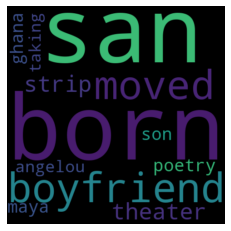

In [507]:
# I want to plot these keywords in a wordcloud 
# Looking at the column, there are just 2 people who have suggested 2 other apps:
text=("born, san, boyfriend, moved, theater, strip, poetry, ghana, maya, son, angelou, taking")
      
# Plotting the information with this wordcloud      
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()




The WordCloud looks nice but is not very informative (due to the quality of the summary).

In [508]:
# The easy 5 steps above, produce a cleaned article. As shown here:
print(article.text)

Poet and novelist Maya Angelou-born Marguerite Johnson-is born in St. Louis, Missouri. Her parents divorced when she was three, and she and her brother went to live with their grandmother in Stamps, Arkansas. When she was eight, she was raped by her mother’s boyfriend. When she revealed what happened, her uncles kicked the culprit to death. Frightened by the power of her own tongue, Angelou chose not to speak for the next five years.

From this quiet beginning emerged a young woman who sang, danced, and recorded poetry. After moving to San Francisco with her mother and brother in 1940, Angelou began taking dance lessons, eventually auditioning for professional theater. However, her plans were put on hold when she had a son at age 16. She moved to San Diego, worked as a nightclub waitress, tangled with drugs and prostitution and danced in a strip club. Ironically, the strip club saved her career: She was discovered there by a theater group.

She auditioned for an international tour of P

In [509]:
#This is the outcome of the summary:
print(article.summary)

Poet and novelist Maya Angelou-born Marguerite Johnson-is born in St. Louis, Missouri.
Frightened by the power of her own tongue, Angelou chose not to speak for the next five years.
After moving to San Francisco with her mother and brother in 1940, Angelou began taking dance lessons, eventually auditioning for professional theater.
She moved to San Diego, worked as a nightclub waitress, tangled with drugs and prostitution and danced in a strip club.
In 1981, Angelou was appointed Professor of American Studies at Wake Forest University in Winston-Salem.


The 20 lines long article text, has been summarized into a 6-line summary text. The summary outcome which is being created through this built-in function, has no option, to decide the length of the summary. If I’ve had used this function on the Wikipedia page, the outcome would have been pretty short and even less informative and messy (with reference parenthesis left in the summary as well!). Please see below:



In [510]:
# Using article library to create a summary for the Wikipedia page
article = Article('https://en.wikipedia.org/wiki/Maya_Angelou')
article.download()
article.parse()
article.nlp()
article.keywords
print(article.summary)

For the English folk rock band, see Angelou (band)Maya Angelou ( ;[1][2] born Marguerite Annie Johnson; April 4, 1928 – May 28, 2014) was an American poet, memoirist, and civil rights activist.
[16]Shortly after Freeman's murder, when Angelou was eight and her brother nine, Angelou and her brother were sent back to their grandmother.
Maya Angelou, 1989[95]Evidence suggests that Angelou was partially descended from the Mende people of West Africa.
[38] Through the writing of her autobiography, Angelou became recognized and highly respected as a spokesperson for Blacks and women.
[161][162] Scholar Lyman B. Hagen places Angelou in the long tradition of African-American autobiography, but claims that Angelou created a unique interpretation of the autobiographical form.


I find the previous method to be cleaner, more useful and comprehensive.

Now that the key concepts of Maya’s biography and bibliography have been captured with both these methods, I’ll go ahead and analyse her masterpiece “And still I rise”.



And Still I Rise, is a collection of 32 poems divided into 3 parts:


Part One " 'Touch Me, Life, Not Softly', has been called "joyful" and affirms the poet's strength as a woman and as a lover' " Wikipedia Contributors (2020).
Here below is the complete poems forming Part One:




In [511]:
# Selecting and showing all of the poems from the whole part one. Showing all as lines
with open ('PART ONE.txt', 'r',  encoding='utf-8') as myfile1:  
    for myline1 in myfile1:              
        print(myline1)
        

PART ONE - Touch Me,Life, Not Softly



1

A Kind of Love, Some Say

 

Is it true the ribs can tell

The kick of a beast from a

Lover’s fist? The bruised

Bones recorded well

The sudden shock, the

Hard impact. Then swollen lids,

Sorry eyes, spoke not

Of lost romance, but hurt.



Hate often is confused. Its

Limits are in zones beyond itself. And

Sadists will not learn that

Love by nature, exacts a pain

Unequalled on the rack.



2

Country Lover

 

Funky blues

Keen toed shoes

High water pants

Saddy night dance

Red soda water

and anybody’s daughter



3

Remembrance 



for Paul

 

Your hands easy

weight, teasing the bees

hived in my hair, your smile at the

slope of my cheek. On the

occasion, you press

above me, glowing, spouting

readiness, mystery rapes

my reason.

 

When you have withdrawn

your self and the magic, when

only the smell of your

love lingers between

my breasts, then, only

then, can I greedily consume your presence.



4

Where We Belong, A Du

Part Two, " 'Traveling', focus on the hardships, such as drug addiction, child abuse, inner-city life, and conditions in the Old South, that the author and others have experienced." Wikipedia Contributors (2020).
Here below is the complete poems forming Part Two:

In [512]:
# Selecting and showing all of the poems from the whole part two. Showing all as lines
with open ('PART TWO.txt', 'r',  encoding='utf-8') as myfile2:  
    for myline2 in myfile2:              
        print(myline2)
        

PART TWO - TRAVELING



1

Junkie Monkey Reel

 

 Shoulders sag,

 The pull of weighted needling.

 Arms drag, smacking wet in soft bone

 Sockets.

 

 Knees thaw,

 Their familiar magic lost. Old bend and

 Lock and bend forgot.

 

 Teeth rock in fetid gums.

 Eyes dart, die, then float in

 Simian juice.

 

 Brains reel,

 Master charts of old ideas erased. The

 Routes are gone beneath the tracks

 Of desert caravans, pre-slavery

 Years ago.

 

 Dreams fail,

 Unguarded fears on homeward streets

 Embrace. Throttling in a dark revenge

 Murder is its sweet romance.



 How long will

 This monkey dance?



2

The Lesson

 

 I keep on dying again.

 Veins collapse, opening like the

 Small fists of sleeping

 Children.

 Memory of old tombs,

 Rotting flesh and worms do

 Not convince me against

 The challenge. The years

 And cold defeat live deep in

 Lines along my face.

 They dull my eyes, yet

 I keep on dying,

 Because I love to live.



3

California Prodigal

 for D

Part Three, " 'And Still I Rise', which gets its name from the volume's title poem, reiterates the themes in Part One and emphasizes the strength she finds in herself and in her community. " Wikipedia Contributors (2020).
Here below is the complete poems forming Part Three:

In [513]:
# Selecting and showing all of the poems from the whole part three. Showing all as lines
with open ('PART THREE.txt', 'r',  encoding='utf-8') as myfile3:  
    for myline3 in myfile3:              
        print(myline3)

PART THREE - AND STILL I RISE



1

Still I Rise

 

 You may write me down in history

 With your bitter, twisted lies,

 You may trod me in the very dirt

 But still, like dust, I’ll rise.



 Does my sassiness upset you?

 Why are you beset with gloom?

 ’Cause I walk like I’ve got oil wells

 Pumping in my living room.



 Just like moons and like suns,

 With the certainty of tides,

 Just like hopes springing high,

 Still I’ll rise.



 Did you want to see me broken?

 Bowed head and lowered eyes?

 Shoulders falling down like teardrops,

 Weakened by my soulful cries.



 Does my haughtiness offend you?

 Don’t you take it awful hard

 ’Cause I laugh like I’ve got gold mines

 Diggin’ in my own back yard.



 You may shoot me with your words,

 You may cut me with your eyes,

 You may kill me with your hatefulness,

 But still, like air, I’ll rise.



 Does my sexiness upset you?

 Does it come as a surprise

 That I dance like I’ve got diamonds

 At the meeting of my thighs?



I decided to pick the “And still I rise” collection poems because they affront a variety of themes, but also because the collection, is divided in 3 parts which specifically and beautifully shows the change of topic, emotion and sentiment of the author.
The first issue I encountered, was to find this collection of poems which was available to be used.
Of course, due to copyrights and licencing, not all them material was available online. 
However, I was able to find this website: https://b-ok.cc/book/5972752/872048  And Still I Rise | Angelou, Maya | download. B-ok.cc. (2011). Copyright © 1978 by Maya Angelou All Rights Reserved .
For the sake of reproducibility, I have separated the 3 parts of the collection into the 3 txt files.
The first step of my analysis would be to clean the 3 parts of punctuation and extra characters to do a count words and make the test easily analysable. I will then proceed and do a sentiment analysis.
I’ll start with Part One: "Touch Me, Life, Not Softly".

In [514]:
# I am starting with Part One of the Collection: "Touch Me, Life, Not Softly". Telling the system the write encoding to use
f = open("PART ONE.txt", 'r', encoding='utf-8')
data1 = f.read()
f.close()

#I removed backspaces, with:
words = data1.lower().replace("\n", " ").split(" ") 

#I removed the relevant punctuation with regex
clean_text1 = re.sub(r'[^\w\s]', "", str(words)).split(" ")
print(clean_text1)
print("Number of words of raw text", len(clean_text1))

['part', 'one', '', 'touch', 'melife', 'not', 'softly', '', '1', 'a', 'kind', 'of', 'love', 'some', 'say', '', '', 'is', 'it', 'true', 'the', 'ribs', 'can', 'tell', 'the', 'kick', 'of', 'a', 'beast', 'from', 'a', 'lovers', 'fist', 'the', 'bruised', 'bones', 'recorded', 'well', 'the', 'sudden', 'shock', 'the', 'hard', 'impact', 'then', 'swollen', 'lids', 'sorry', 'eyes', 'spoke', 'not', 'of', 'lost', 'romance', 'but', 'hurt', '', 'hate', 'often', 'is', 'confused', 'its', 'limits', 'are', 'in', 'zones', 'beyond', 'itself', 'and', 'sadists', 'will', 'not', 'learn', 'that', 'love', 'by', 'nature', 'exacts', 'a', 'pain', 'unequalled', 'on', 'the', 'rack', '', '2', 'country', 'lover', '', '', 'funky', 'blues', 'keen', 'toed', 'shoes', 'high', 'water', 'pants', 'saddy', 'night', 'dance', 'red', 'soda', 'water', 'and', 'anybodys', 'daughter', '', '3', 'remembrance', '', '', 'for', 'paul', '', '', 'your', 'hands', 'easy', 'weight', 'teasing', 'the', 'bees', 'hived', 'in', 'my', 'hair', 'your', 

In [515]:
#Let's use numpy to list all the words in the sonnet 
a = np.array(list(clean_text1))
print(a)

['part' 'one' '' ... 'for' 'a' 'time']


In [516]:
#Let's use nltk to show better the occurances of the words
text = a

freq = nltk.FreqDist(text)

# let's show these in a cleaner way
for key,val in freq.items():
    print(str(val) + " " + str(key))

1 part
3 one
46 
2 touch
1 melife
7 not
1 softly
1 1
28 a
1 kind
24 of
5 love
2 some
7 say
6 is
3 it
1 true
50 the
1 ribs
2 can
2 tell
1 kick
1 beast
1 from
1 lovers
1 fist
1 bruised
1 bones
1 recorded
1 well
1 sudden
1 shock
1 hard
1 impact
8 then
1 swollen
1 lids
1 sorry
3 eyes
1 spoke
1 lost
1 romance
6 but
2 hurt
1 hate
1 often
1 confused
5 its
1 limits
2 are
21 in
1 zones
2 beyond
2 itself
20 and
1 sadists
4 will
1 learn
7 that
1 by
1 nature
1 exacts
1 pain
1 unequalled
6 on
1 rack
1 2
2 country
1 lover
1 funky
1 blues
1 keen
1 toed
2 shoes
2 high
2 water
1 pants
1 saddy
1 night
2 dance
1 red
1 soda
1 anybodys
1 daughter
1 3
1 remembrance
8 for
1 paul
16 your
3 hands
2 easy
1 weight
1 teasing
2 bees
1 hived
29 my
2 hair
4 smile
2 at
1 slope
1 cheek
1 occasion
19 you
1 press
1 above
12 me
1 glowing
1 spouting
1 readiness
2 mystery
1 rapes
1 reason
8 when
5 have
1 withdrawn
1 self
1 magic
2 only
1 smell
1 lingers
1 between
3 breasts
30 i
1 greedily
1 consume
1 presence
1 4
3 where
2


There is a problem with this list: many stop words, like (not, a, is, it etc..) are counted in this occurrence of words list. I want them to be excluded.
So, I will get the stop words list, present in the nltk library, and then make sure my text excludes all of them.


In [517]:
# The list shows all of the words (sopwords and meaningless info also). I am going to clean the list.
#I am, first of all, checking all the stopwords present in library stopwords.
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

print(stopwords.words('english'))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now, I am tokenizing my text (cleaned of punctuation) and removing from it, any stop words included in the list above.

In [518]:
# Cleaning text of punctuation, without using the .split function
Nopunct_text = re.sub(r'[^a-zA-Z]', " ", str(words))

#tokenizing my text
text_tokens = word_tokenize(Nopunct_text)

#removing stopwords from my text
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

print(tokens_without_sw)

['part', 'touch', 'life', 'softly', 'kind', 'love', 'say', 'true', 'ribs', 'tell', 'kick', 'beast', 'lover', 'fist', 'bruised', 'bones', 'recorded', 'well', 'sudden', 'shock', 'hard', 'impact', 'swollen', 'lids', 'sorry', 'eyes', 'spoke', 'lost', 'romance', 'hurt', 'hate', 'often', 'confused', 'limits', 'zones', 'beyond', 'sadists', 'learn', 'love', 'nature', 'exacts', 'pain', 'unequalled', 'rack', 'country', 'lover', 'funky', 'blues', 'keen', 'toed', 'shoes', 'high', 'water', 'pants', 'saddy', 'night', 'dance', 'red', 'soda', 'water', 'anybody', 'daughter', 'remembrance', 'paul', 'hands', 'easy', 'weight', 'teasing', 'bees', 'hived', 'hair', 'smile', 'slope', 'cheek', 'occasion', 'press', 'glowing', 'spouting', 'readiness', 'mystery', 'rapes', 'reason', 'withdrawn', 'self', 'magic', 'smell', 'love', 'lingers', 'breasts', 'greedily', 'consume', 'presence', 'belong', 'duet', 'every', 'town', 'village', 'every', 'city', 'square', 'crowded', 'places', 'searched', 'faces', 'hoping', 'find'

In [519]:
#I'll calculate again the word occurencies from my stopword-free text
a = np.array(list(tokens_without_sw))
text = a
freq = nltk.FreqDist(text)


for key,val in freq.items():
    print(str(val) + " " + str(key))
    


1 part
2 touch
2 life
1 softly
1 kind
5 love
7 say
1 true
1 ribs
2 tell
1 kick
1 beast
2 lover
1 fist
1 bruised
1 bones
1 recorded
1 well
1 sudden
1 shock
1 hard
1 impact
1 swollen
1 lids
1 sorry
3 eyes
1 spoke
1 lost
1 romance
2 hurt
1 hate
1 often
1 confused
1 limits
1 zones
2 beyond
1 sadists
1 learn
1 nature
1 exacts
1 pain
1 unequalled
1 rack
2 country
1 funky
1 blues
1 keen
1 toed
2 shoes
2 high
2 water
1 pants
1 saddy
1 night
2 dance
1 red
1 soda
1 anybody
1 daughter
1 remembrance
1 paul
3 hands
2 easy
1 weight
1 teasing
2 bees
1 hived
2 hair
4 smile
1 slope
1 cheek
1 occasion
1 press
1 glowing
1 spouting
1 readiness
2 mystery
1 rapes
1 reason
1 withdrawn
1 self
1 magic
1 smell
1 lingers
3 breasts
1 greedily
1 consume
1 presence
2 belong
1 duet
3 every
1 town
1 village
1 city
1 square
1 crowded
1 places
1 searched
1 faces
1 hoping
1 find
1 someone
1 read
1 mysterious
1 meanings
1 distant
1 stars
1 went
1 schoolrooms
1 poolrooms
1 half
1 lighted
1 cocktail
1 bars
1 braving
1 dang

I want to present these words in a more meaningful way: I will be filtering for 1 and then 2+ occurrences and analyse these.
Starting with 1 occurrence.



     Counts     Words
2         1    softly
3         1      kind
6         1      true
7         1      ribs
9         1      kick
..      ...       ...
361       1  precious
362       1     pearl
363       1     loved
364       1     shine
365       1   perfect

[307 rows x 2 columns]


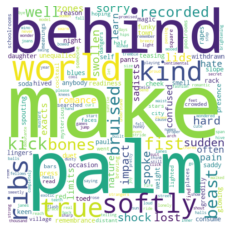

In [520]:
# I've imported the results above into an excel. Now reading the excel into this notebook
df = pd.read_excel('PartOne Word Frequency.xlsx',
                   usecols= [0])
# Naming the column
df.columns = ['Word Frequency']
df.head()

# Splitting numbers from words into 2 columns
Word_Frequency = df['Word Frequency'].str.split(' ',expand=True)
Word_Frequency

# Naming these 2 columns
Word_Frequency.columns = ['Counts', 'Words']
Word_Frequency

# Creating a dataframe with these 2 columns
df = pd.DataFrame(Word_Frequency, columns = ['Counts', 'Words'])
df

# Assigning the correct type to the columns
df['Words']= df['Words'].astype('category')
df['Counts']= df['Counts'].astype('int')

# There are way too many words in my df, I'll select only words with frequency >2

# let me select fro the dataframe, only the rows with a value =1 with .loc
New_Count0 = (df.loc[df['Counts'] == 1])
New_Count0

df0 = pd.DataFrame(New_Count0, columns = ['Counts', 'Words'])
print(df0)

# Substituting my id column with Words
df0.set_index('Words', inplace=True)
df0

# First, creating a text list of all the words in column Words and setting these as string
text0 = " ".join(review for review in New_Count0.Words.astype(str))
text0

# Plotting the information with this wordcloud      
wordcloud = WordCloud(width=480, height=480, margin=0, background_color="white").generate(text0)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()



As we can see from the word cloud, with frequency one, the words are generally neutral or positive.
Overall, words like kind, softly, daughter, romance etc. confirm the fact that Part One, actually has been called "joyful”: words.
Let's continue to analysing words with 2+ occurrences, to better picture the positivity.



              Counts
Words               
love               5
say                7
eyes               3
hands              3
smile              4
breasts            3
every              3
going              3
always             3
try                3
like               4
phenomenal         5
woman              9
phenomenally       4
walk               3
see                5
young              3
time               6


'The mode is woman'

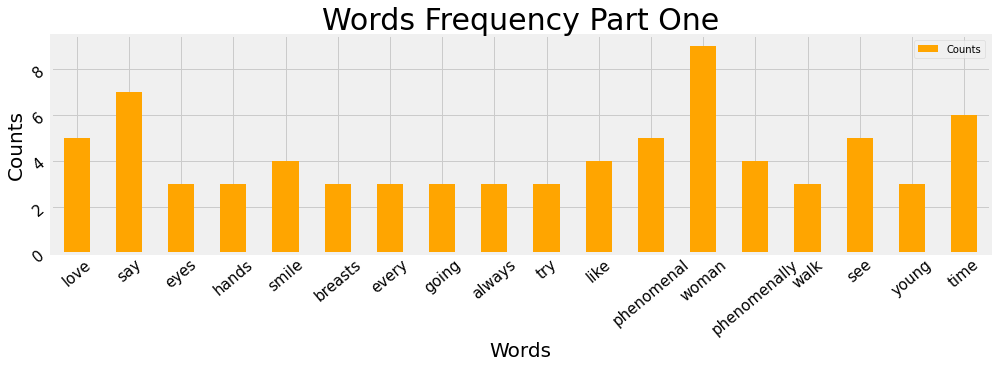

In [521]:
# let me select from the dataframe, only the rows with a value >2 with .loc
New_Count = (df.loc[df['Counts'] > 2])
New_Count

df2 = pd.DataFrame(New_Count, columns = ['Counts', 'Words'])
df2


# Substituting my id column with Words
df2.set_index('Words', inplace=True)
df2


df3 = pd.DataFrame(df2, columns = ['Counts'], index = ['love', 'say', 'eyes', 'hands', 'smile', 'breasts', 'every', 'going', 'always', 'try', 'like', 'phenomenal', 'woman', 'phenomenally', 'walk', 'see', 'young', 'time'])
print(df3)
  
# Driver code 
index = ('love', 'say', 'eyes', 'hands', 'smile', 'breasts', 'every', 'going', 'always', 'try', 'like', 'phenomenal', 'woman', 'phenomenally', 'walk', 'see', 'young', 'time') 


df3 = pd.DataFrame(df2, columns = ['Counts'], index = ['love', 'say', 'eyes', 'hands', 'smile', 'breasts', 'every', 'going', 'always', 'try', 'like', 'phenomenal', 'woman', 'phenomenally', 'walk', 'see', 'young', 'time'])

# Plotting
ax = df3.plot.bar(rot=0, fontsize=4, figsize=(15,4), color=['orange'])


# To make the labels on ticks on the axes bigger and more visible
plt.yticks(size = 10)


# setting labels
ax.set_title('Words Frequency Part One', size = 30)
ax.set_xlabel('Words',  size = 20)
ax.set_ylabel('Counts',  size = 20)
plt.tick_params(axis='both', which='major', labelsize=15, rotation=40)

# Mode is:
mode = ('The mode is woman')
mode


The bar chart shows for each word, the number of occurrences and we can spot that (in terms of substantives and adjectives) the word woman, is the most frequent, followed by time, phenomenal, love, smile, like, phenomenally. Overall positive words, in confirmation, once again, to the fact that Part One, actually has been called "joyful” and affirms the poet's strength as a woman and as a lover.

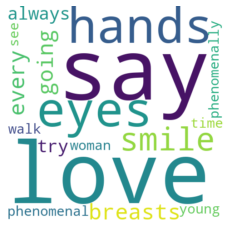

In [522]:

# I want to plot these keywords in a wordcloud 
# Looking at the column, there are just 2 people who have suggested 2 other apps:
text = ("love, say, eyes, hands, smile, breasts, every, going, always, try, like, phenomenal, woman, phenomenally, walk, see, young, time")

# Plotting the information with this wordcloud      
wordcloud = WordCloud(width=480, height=480, margin=0, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

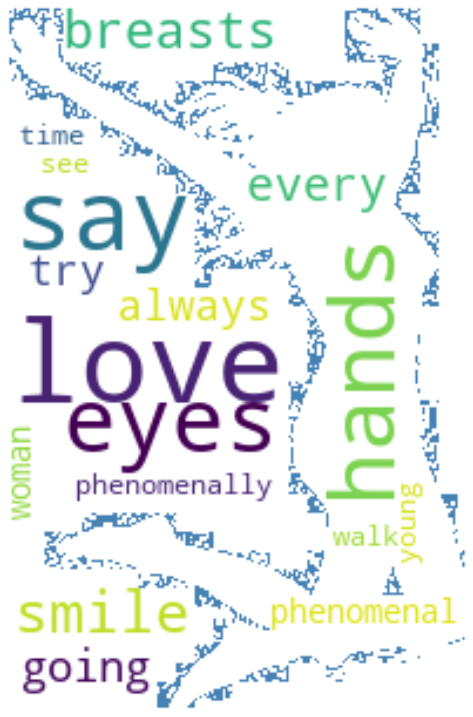

In [523]:
# Let's express these sentiments with a more colourful and fun depiction, using a woman shaped image

# Creating my mask
mask = np.array(Image.open("Joy.jfif"))
mask

# Using wordcloud with white background and setting image countour
wc = WordCloud(background_color='white', mask=mask, mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='steelblue')

# Generating and showing this wc
wc.generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

                                     



Now that we've analysed Part One, the next step will be to replicate the above analysis, to get the words occurency, to the 2 other parts of the poem Collections: Part Two "Traveling" and Part Three "And Still I Rise".
Let's start with Part Two.

In [524]:
# Continuing with Part Two of the Collection: "Traveling". Also, specifying the encoding.
f = open("PART TWO.txt", 'r', encoding='utf-8')

data2 = f.read()

f.close()

#I removed backspaces, with:
words = data2.lower().replace("\n", " ").split(" ") 

#I removed the relevant punctuation with regex
clean_text2 = re.sub(r'[^\w\s]', "", str(words)).split(" ")
print(clean_text2)
print("Number of words of raw text", len(clean_text2))



['part', 'two', '', 'traveling', '', '1', 'junkie', 'monkey', 'reel', '', '', '', 'shoulders', 'sag', '', 'the', 'pull', 'of', 'weighted', 'needling', '', 'arms', 'drag', 'smacking', 'wet', 'in', 'soft', 'bone', '', 'sockets', '', '', '', 'knees', 'thaw', '', 'their', 'familiar', 'magic', 'lost', 'old', 'bend', 'and', '', 'lock', 'and', 'bend', 'forgot', '', '', '', 'teeth', 'rock', 'in', 'fetid', 'gums', '', 'eyes', 'dart', 'die', 'then', 'float', 'in', '', 'simian', 'juice', '', '', '', 'brains', 'reel', '', 'master', 'charts', 'of', 'old', 'ideas', 'erased', 'the', '', 'routes', 'are', 'gone', 'beneath', 'the', 'tracks', '', 'of', 'desert', 'caravans', 'preslavery', '', 'years', 'ago', '', '', '', 'dreams', 'fail', '', 'unguarded', 'fears', 'on', 'homeward', 'streets', '', 'embrace', 'throttling', 'in', 'a', 'dark', 'revenge', '', 'murder', 'is', 'its', 'sweet', 'romance', '', '', 'how', 'long', 'will', '', 'this', 'monkey', 'dance', '', '2', 'the', 'lesson', '', '', '', 'i', 'keep'

In [525]:
#Let's use numpy to list all the words in the sonnet 
b = np.array(list(clean_text2))
print(b)

['part' 'two' '' ... 'days' 'are' 'dying']


In [526]:
# Let's use nltk to show better the occurances of the words
text = b

freq = nltk.FreqDist(text)

# Let's show these in a cleaner way
for key,val in freq.items():
    print(str(val) + " " + str(key))

1 part
1 two
465 
1 traveling
1 1
1 junkie
2 monkey
2 reel
1 shoulders
1 sag
86 the
1 pull
39 of
1 weighted
1 needling
3 arms
1 drag
1 smacking
2 wet
32 in
1 soft
1 bone
1 sockets
1 knees
1 thaw
6 their
1 familiar
1 magic
1 lost
9 old
2 bend
69 and
1 lock
1 forgot
1 teeth
1 rock
1 fetid
1 gums
2 eyes
1 dart
3 die
5 then
2 float
1 simian
1 juice
1 brains
1 master
1 charts
1 ideas
1 erased
1 routes
6 are
1 gone
2 beneath
1 tracks
1 desert
1 caravans
1 preslavery
3 years
1 ago
3 dreams
1 fail
1 unguarded
1 fears
14 on
1 homeward
2 streets
1 embrace
1 throttling
26 a
2 dark
1 revenge
2 murder
12 is
6 its
3 sweet
1 romance
1 how
5 long
5 will
7 this
2 dance
1 2
1 lesson
26 i
5 keep
3 dying
4 again
1 veins
1 collapse
1 opening
2 like
1 small
1 fists
1 sleeping
7 children
2 memory
1 tombs
1 rotting
2 flesh
1 worms
3 do
10 not
1 convince
14 me
1 against
1 challenge
3 cold
1 defeat
3 live
2 deep
1 lines
1 along
20 my
1 face
10 they
1 dull
4 yet
1 because
1 love
43 to
1 3
1 california
1 prodigal

In [527]:
# The list shows all of the words (sopwords and meaningless info also). I am going to clean the list.
#I am, first of all, checking all the stopwords present in library stopwords.
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [528]:
# Cleaning text of punctuation, without using the .split function
Nopunct_text = re.sub(r'[^a-zA-Z]', " ", str(words))

#tokenizing my text
text_tokens = word_tokenize(Nopunct_text)

#removing stopwords from my text
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

print(tokens_without_sw)

['part', 'two', 'traveling', 'junkie', 'monkey', 'reel', 'shoulders', 'sag', 'pull', 'weighted', 'needling', 'arms', 'drag', 'smacking', 'wet', 'soft', 'bone', 'sockets', 'knees', 'thaw', 'familiar', 'magic', 'lost', 'old', 'bend', 'lock', 'bend', 'forgot', 'teeth', 'rock', 'fetid', 'gums', 'eyes', 'dart', 'float', 'simian', 'juice', 'brains', 'reel', 'master', 'charts', 'old', 'ideas', 'erased', 'routes', 'gone', 'beneath', 'tracks', 'desert', 'caravans', 'pre', 'slavery', 'years', 'ago', 'dreams', 'fail', 'unguarded', 'fears', 'homeward', 'streets', 'embrace', 'throttling', 'dark', 'revenge', 'murder', 'sweet', 'romance', 'long', 'monkey', 'dance', 'lesson', 'keep', 'dying', 'veins', 'collapse', 'opening', 'like', 'small', 'fists', 'sleeping', 'children', 'memory', 'old', 'tombs', 'rotting', 'flesh', 'worms', 'convince', 'challenge', 'years', 'cold', 'defeat', 'live', 'deep', 'lines', 'along', 'dull', 'eyes', 'yet', 'keep', 'dying', 'love', 'live', 'california', 'prodigal', 'david', 

In [529]:
#I'll calculate again the word occurencies from my stopword-free text
b = np.array(list(tokens_without_sw))
text2 = b

b

freq = nltk.FreqDist(text2)


for key,val in freq.items():
    print(str(val) + " " + str(key))
    


1 part
1 two
1 traveling
1 junkie
2 monkey
2 reel
1 shoulders
1 sag
1 pull
1 weighted
1 needling
3 arms
1 drag
1 smacking
2 wet
1 soft
1 bone
1 sockets
1 knees
1 thaw
1 familiar
1 magic
1 lost
9 old
2 bend
1 lock
1 forgot
1 teeth
1 rock
1 fetid
1 gums
2 eyes
1 dart
2 float
1 simian
1 juice
1 brains
1 master
1 charts
1 ideas
1 erased
1 routes
1 gone
2 beneath
1 tracks
1 desert
1 caravans
1 pre
1 slavery
3 years
1 ago
3 dreams
1 fail
1 unguarded
1 fears
1 homeward
2 streets
1 embrace
1 throttling
2 dark
1 revenge
2 murder
3 sweet
1 romance
5 long
2 dance
1 lesson
5 keep
3 dying
1 veins
1 collapse
1 opening
2 like
1 small
1 fists
1 sleeping
7 children
2 memory
1 tombs
1 rotting
2 flesh
1 worms
1 convince
1 challenge
3 cold
1 defeat
3 live
2 deep
1 lines
1 along
1 dull
4 yet
1 love
1 california
1 prodigal
1 david
1 p
1 b
1 eye
1 follows
2 land
1 slips
1 upward
1 creases
1 forms
1 gentle
1 buttocks
3 young
1 giant
1 nestle
1 adobe
1 bricks
1 washed
1 whiteness
1 paled
1 umber
1 await
2 anot

There are still a few words, I'd like to remove from this list. I will, therefore add these words to the stopwords list and re-calcute the frequency list.

In [530]:
# Adding these new words to the stopwords list
new_stopwords = stopwords.words('english')
new_stopwords.append('part')
new_stopwords.append('two')
new_stopwords.append('pre')
new_stopwords.append('yet')
new_stopwords.append('p')
new_stopwords.append('b')
new_stopwords.append('xa')
new_stopwords.append('let')

# Removing the complete updated stopword list from text
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(Nopunct_text)
remove_sw = [word for word in text_tokens if not word in new_stopwords]
 
print(remove_sw)



    


['traveling', 'junkie', 'monkey', 'reel', 'shoulders', 'sag', 'pull', 'weighted', 'needling', 'arms', 'drag', 'smacking', 'wet', 'soft', 'bone', 'sockets', 'knees', 'thaw', 'familiar', 'magic', 'lost', 'old', 'bend', 'lock', 'bend', 'forgot', 'teeth', 'rock', 'fetid', 'gums', 'eyes', 'dart', 'die', 'float', 'simian', 'juice', 'brains', 'reel', 'master', 'charts', 'old', 'ideas', 'erased', 'routes', 'gone', 'beneath', 'tracks', 'desert', 'caravans', 'slavery', 'years', 'ago', 'dreams', 'fail', 'unguarded', 'fears', 'homeward', 'streets', 'embrace', 'throttling', 'dark', 'revenge', 'murder', 'sweet', 'romance', 'long', 'monkey', 'dance', 'lesson', 'keep', 'dying', 'veins', 'collapse', 'opening', 'like', 'small', 'fists', 'sleeping', 'children', 'memory', 'old', 'tombs', 'rotting', 'flesh', 'worms', 'convince', 'challenge', 'years', 'cold', 'defeat', 'live', 'deep', 'lines', 'along', 'face', 'dull', 'eyes', 'keep', 'dying', 'love', 'live', 'california', 'prodigal', 'david', 'eye', 'follow

In [531]:

# I'll calculate again the word occurencies from my stopword-free text
c = np.array(list(remove_sw))
text3 = c
c

freq = nltk.FreqDist(text3)


for key,val in freq.items():
    print(str(val) + " " + str(key))


1 traveling
1 junkie
2 monkey
2 reel
1 shoulders
1 sag
1 pull
1 weighted
1 needling
3 arms
1 drag
1 smacking
2 wet
1 soft
1 bone
1 sockets
1 knees
1 thaw
1 familiar
1 magic
1 lost
9 old
2 bend
1 lock
1 forgot
1 teeth
1 rock
1 fetid
1 gums
2 eyes
1 dart
3 die
2 float
1 simian
1 juice
1 brains
1 master
1 charts
1 ideas
1 erased
1 routes
1 gone
2 beneath
1 tracks
1 desert
1 caravans
1 slavery
3 years
1 ago
3 dreams
1 fail
1 unguarded
1 fears
1 homeward
2 streets
1 embrace
1 throttling
2 dark
1 revenge
2 murder
3 sweet
1 romance
5 long
2 dance
1 lesson
5 keep
3 dying
1 veins
1 collapse
1 opening
2 like
1 small
1 fists
1 sleeping
7 children
2 memory
1 tombs
1 rotting
2 flesh
1 worms
1 convince
1 challenge
3 cold
1 defeat
3 live
2 deep
1 lines
1 along
1 face
1 dull
1 love
1 california
1 prodigal
1 david
1 eye
1 follows
2 land
1 slips
1 upward
1 creases
1 forms
1 gentle
1 buttocks
3 young
1 giant
1 nestle
1 adobe
1 bricks
1 washed
1 whiteness
1 paled
1 umber
1 await
2 another
1 century
3 star

I want to present these words in a nicer way, using a dataframe and frequency bar chart.

In [532]:
# I've imported the results above into an excel. Now reading the excel into this notebook
df = pd.read_excel('PartTwo Word Frequency.xlsx',
                   usecols= [0])

# Naming the column
df.columns = ['Word Frequency']
df.head()

# Splitting numbers from words into 2 columns
Word_Frequency = df['Word Frequency'].str.split(' ',expand=True)
Word_Frequency

# Naming these 2 columns
Word_Frequency.columns = ['Counts', 'Words']
Word_Frequency

# Creating a dataframe with these 2 columns
df = pd.DataFrame(Word_Frequency, columns = ['Counts', 'Words'])

# Checking the type for columns counts
print(df['Counts'])

# Setting the df types for each columns. Wasn't able to set counts as int.
df['Counts']= df['Counts'].astype('float')
df['Words']= df['Words'].astype('category')

# Filtering only for the words, which frequency is 2
New_Count = (df.loc[df['Counts'] == 2])
New_Count

New_Count.columns = ['Counts2', 'Words2']
New_Count





0      1
1      2
2      2
3      1
4      1
      ..
729    1
730    1
731    1
732    1
733    1
Name: Counts, Length: 734, dtype: object


,Counts2,Words2
1,2.0,monkey
2,2.0,reel
11,2.0,wet
21,2.0,bend
28,2.0,eyes
...,...,...
634,2.0,graves
635,2.0,worked
636,2.0,slaves
650,2.0,lone


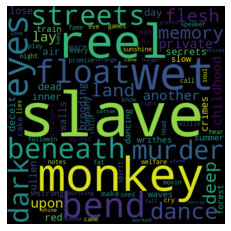

In [533]:
# Plotting these words with a word count
# First, creating a text list of all the words in column Words2 and setting these as string
text = " ".join(review for review in New_Count.Words2.astype(str))
text

# Plotting the information with this wordcloud      
wordcloud = WordCloud(width=480, height=480, margin=0, background_color="black").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [534]:
# Filtering only for the words, which frequency is 1
New_Count1 = (df.loc[df['Counts'] == 1])
New_Count1

New_Count1.columns = ['Counts2', 'Words2']
New_Count1

,Counts2,Words2
0,1.0,junkie
3,1.0,shoulders
4,1.0,sag
5,1.0,pull
6,1.0,weighted
...,...,...
729,1.0,god
730,1.0,crying
731,1.0,shame
732,1.0,blanket


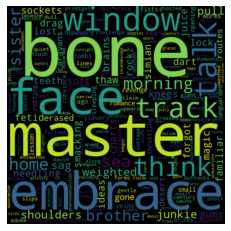

In [535]:
# Plotting these words with a word count
# First, creating a text list of all the words in column Words2 and setting these as string
text1 = " ".join(review for review in New_Count1.Words2.astype(str))
text1

# Plotting the information with this wordcloud      
wordcloud = WordCloud(width=480, height=480, margin=0, background_color="black").generate(text1)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


As we can see from the word cloud, with frequency one and two, the words are way more negative and darker compared to the previous part. This confirms the themes discussed within part two: words like slave, murder, dark, deceit, flesh, bone, smacking and so on confirms the focus on the hardships, such as drug addiction, child abuse, inner-city life, and conditions in the Old South, that the author and black people have experienced. 
Remember, this is the list of words with 1 and 2 occurrences, within the collection.
I will now analyse the rest of the more frequent words (3+ frequencies).


'The mode is one'

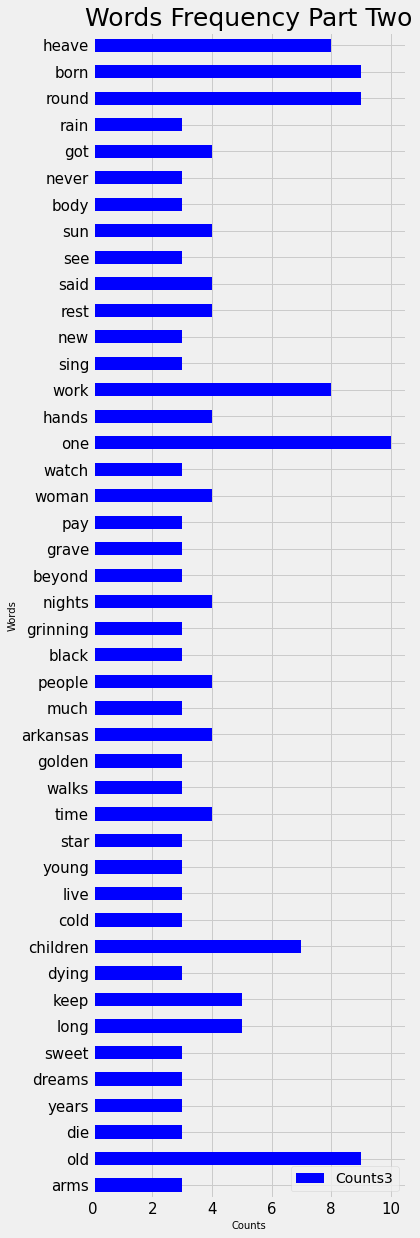

In [536]:
# Filtering only for the words, which frequency is > 2
New_Count2 = (df.loc[df['Counts'] > 2])
New_Count2

New_Count2.columns = ['Counts3', 'Words3']

df4 = pd.DataFrame(New_Count2, columns = ['Counts3', 'Words3'])

# Substituting my id column with Words
df4.set_index('Words3', inplace=True)
df4


# Plotting my bar graph with a new style
matplotlib.style.use('fivethirtyeight') 
df4.plot(kind="barh", color=['blue'], rot=0, fontsize=4, figsize=(5,20))


# setting labels
plt.xlabel('Counts', size=10)
plt.title('Words Frequency Part Two', size=25)
plt.ylabel('Words', size=10)
plt.tick_params(axis='both', which='major', labelsize=15)

# Mode is:
mode = ('The mode is one')
mode


The vertical bar chart shows for each word, the number of occurrences. We can spot that (in terms of substantives and adjectives) the word one, is the most frequent, followed by old, born, round, heave, work etc. Other words, like rain, grave, nights, grinning, cold, dying and so on, emphasise the darker themes of part two.
The word arkansas, black and people geographically place the novels in the Old South, birth place of the author, emphasising the hardships of the black experience in that area.


In [537]:
# Plotting these words with a word count whitin a shape
# First, creating a text list of all the words in column Words3 and setting these as string
text = " ".join(review for review in New_Count2.Words3.astype(str))
text



'arms old die years dreams sweet long keep dying children cold live young star time walks golden arkansas much people black grinning nights beyond grave pay woman watch one hands work sing new rest said see sun body never got rain round born heave'

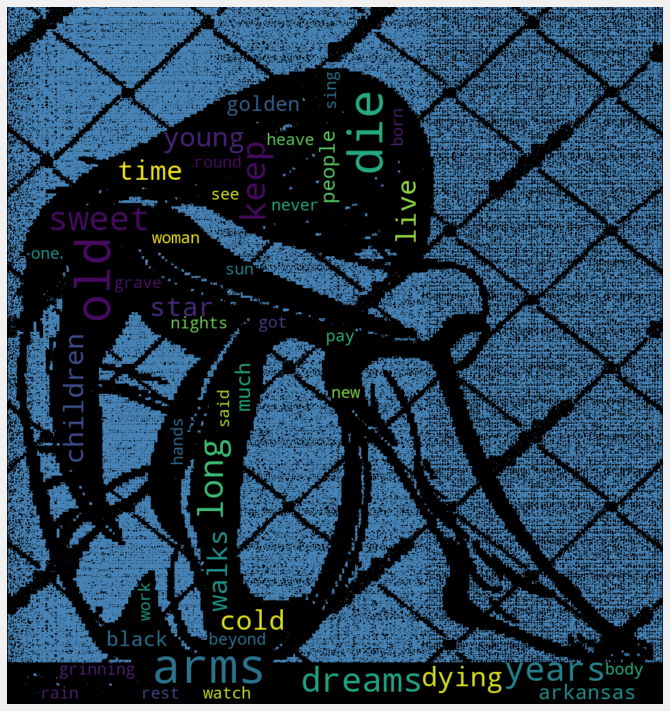

In [538]:
# Let's express these sentiments with a shaped image

# Creating my mask
mask = np.array(Image.open("Sadness.jpg"))
mask

# Using wordcloud with white background and setting image countour
wc = WordCloud(background_color='black', mask=mask, mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='steelblue')

# Generating and showing this wc
wc.generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

                                     



Now, let's analyse Part Three "And Still I Rise". 

In [539]:
# Continuing with Part Three of the Collection: "And Still I Rise"
f = open("PART THREE.txt", 'r',  encoding='utf-8')

data3 = f.read()

f.close()

#I removed backspaces, with:
words = data3.lower().replace("\n", " ").split(" ") 

#I removed the relevant punctuation with regex
clean_text3 = re.sub(r'[^\w\s]', "", str(words)).split(" ")
print(clean_text3)
print("Number of words of raw text", len(clean_text3))


['part', 'three', '', 'and', 'still', 'i', 'rise', '', '1', 'still', 'i', 'rise', '', '', '', 'you', 'may', 'write', 'me', 'down', 'in', 'history', '', 'with', 'your', 'bitter', 'twisted', 'lies', '', 'you', 'may', 'trod', 'me', 'in', 'the', 'very', 'dirt', '', 'but', 'still', 'like', 'dust', 'ill', 'rise', '', '', 'does', 'my', 'sassiness', 'upset', 'you', '', 'why', 'are', 'you', 'beset', 'with', 'gloom', '', 'cause', 'i', 'walk', 'like', 'ive', 'got', 'oil', 'wells', '', 'pumping', 'in', 'my', 'living', 'room', '', '', 'just', 'like', 'moons', 'and', 'like', 'suns', '', 'with', 'the', 'certainty', 'of', 'tides', '', 'just', 'like', 'hopes', 'springing', 'high', '', 'still', 'ill', 'rise', '', '', 'did', 'you', 'want', 'to', 'see', 'me', 'broken', '', 'bowed', 'head', 'and', 'lowered', 'eyes', '', 'shoulders', 'falling', 'down', 'like', 'teardrops', '', 'weakened', 'by', 'my', 'soulful', 'cries', '', '', 'does', 'my', 'haughtiness', 'offend', 'you', '', 'dont', 'you', 'take', 'it', '

In [540]:
#Let's use numpy to list all the words in the sonnet 
d = np.array(list(clean_text3))
print(d)


['part' 'three' '' ... 'to' 'thank' 'you']


In [541]:
# Let's use nltk to show better the occurances of the words
text = d

freq = nltk.FreqDist(text)

# Let's show these in a cleaner way
for key,val in freq.items():
    print(str(val) + " " + str(key))





1 part
1 three
385 
51 and
8 still
49 i
13 rise
1 1
32 you
6 may
1 write
33 me
8 down
26 in
1 history
12 with
25 your
1 bitter
1 twisted
2 lies
1 trod
66 the
1 very
1 dirt
7 but
17 like
1 dust
12 ill
4 does
37 my
1 sassiness
2 upset
2 why
4 are
1 beset
1 gloom
3 cause
2 walk
4 ive
6 got
1 oil
1 wells
1 pumping
4 living
1 room
6 just
1 moons
1 suns
1 certainty
21 of
1 tides
1 hopes
1 springing
2 high
2 did
6 want
28 to
5 see
1 broken
1 bowed
1 head
1 lowered
4 eyes
1 shoulders
2 falling
1 teardrops
1 weakened
2 by
1 soulful
1 cries
1 haughtiness
1 offend
13 dont
2 take
12 it
1 awful
1 hard
1 laugh
1 gold
1 mines
2 diggin
1 own
2 back
1 yard
1 shoot
1 words
1 cut
1 kill
1 hatefulness
1 air
1 sexiness
2 come
5 as
21 a
1 surprise
11 that
3 dance
1 diamonds
17 at
1 meeting
1 thighs
8 out
1 huts
1 historys
1 shame
5 up
4 from
3 past
3 thats
1 rooted
2 pain
13 im
11 black
2 ocean
1 leaping
1 wide
1 welling
1 swelling
1 bear
1 tide
1 leaving
1 behind
1 nights
1 terror
1 fear
5 into
1 daybreak


In [542]:
# Cleaning text of punctuation, without using the .split function
Nopunct_text3 = re.sub(r'[^a-zA-Z]', " ", str(words))

#tokenizing my text
text_tokens3 = word_tokenize(Nopunct_text3)

#removing stopwords from my text (from the updated stopword list)
tokens_without_sw3 = [word for word in text_tokens3 if not word in new_stopwords]

print(tokens_without_sw3)






['three', 'still', 'rise', 'still', 'rise', 'may', 'write', 'history', 'bitter', 'twisted', 'lies', 'may', 'trod', 'dirt', 'still', 'like', 'dust', 'rise', 'sassiness', 'upset', 'beset', 'gloom', 'cause', 'walk', 'like', 'got', 'oil', 'wells', 'pumping', 'living', 'room', 'like', 'moons', 'like', 'suns', 'certainty', 'tides', 'like', 'hopes', 'springing', 'high', 'still', 'rise', 'want', 'see', 'broken', 'bowed', 'head', 'lowered', 'eyes', 'shoulders', 'falling', 'like', 'teardrops', 'weakened', 'soulful', 'cries', 'haughtiness', 'offend', 'take', 'awful', 'hard', 'cause', 'laugh', 'like', 'got', 'gold', 'mines', 'diggin', 'back', 'yard', 'may', 'shoot', 'words', 'may', 'cut', 'eyes', 'may', 'kill', 'hatefulness', 'still', 'like', 'air', 'rise', 'sexiness', 'upset', 'come', 'surprise', 'dance', 'like', 'got', 'diamonds', 'meeting', 'thighs', 'huts', 'history', 'shame', 'rise', 'past', 'rooted', 'pain', 'rise', 'black', 'ocean', 'leaping', 'wide', 'welling', 'swelling', 'bear', 'tide', 

In [543]:

# I'll calculate again the word occurencies from my stopword-free text
e = np.array(list(tokens_without_sw3))
text4 = e
e

freq = nltk.FreqDist(text4)


for key,val in freq.items():
    print(str(val) + " " + str(key))

1 three
8 still
13 rise
6 may
1 write
2 history
1 bitter
1 twisted
2 lies
1 trod
1 dirt
17 like
1 dust
1 sassiness
2 upset
1 beset
1 gloom
3 cause
2 walk
6 got
1 oil
1 wells
1 pumping
4 living
1 room
1 moons
1 suns
1 certainty
1 tides
1 hopes
1 springing
2 high
6 want
5 see
1 broken
1 bowed
1 head
1 lowered
4 eyes
1 shoulders
2 falling
1 teardrops
1 weakened
1 soulful
1 cries
1 haughtiness
1 offend
2 take
1 awful
1 hard
1 laugh
1 gold
1 mines
2 diggin
2 back
1 yard
1 shoot
1 words
1 cut
1 kill
1 hatefulness
1 air
1 sexiness
2 come
1 surprise
3 dance
1 diamonds
1 meeting
1 thighs
1 huts
1 shame
3 past
1 rooted
2 pain
11 black
2 ocean
1 leaping
1 wide
1 welling
1 swelling
1 bear
1 tide
1 leaving
1 behind
1 nights
1 terror
1 fear
1 daybreak
1 wondrously
1 clear
2 bringing
1 gifts
1 ancestors
1 gave
1 dream
1 hope
1 slave
10 bad
1 dancin
1 funky
1 chicken
1 eatin
1 ribs
1 tips
1 latest
1 sounds
1 drinkin
1 gin
1 sips
1 puttin
1 rag
1 tightenin
1 fro
1 wrappin
1 blackness
2 shine
1 glow
1 h

In [544]:
# I've imported the results above into an excel. Now reading the excel into this notebook
df = pd.read_excel('PartThree Word Frequency.xlsx',
                   usecols= [0])

# Naming the column
df.columns = ['Word Frequency']
df.head()

# Splitting numbers from words into 2 columns
Word_Frequency = df['Word Frequency'].str.split(' ',expand=True)
Word_Frequency

# Naming these 2 columns
Word_Frequency.columns = ['Counts', 'Words']
Word_Frequency

# Creating a dataframe with these 2 columns
df = pd.DataFrame(Word_Frequency, columns = ['Counts', 'Words'])

# Setting the df types for each columns. Wasn't able to set counts as int.
df['Counts']= df['Counts'].astype('float')
df['Words']= df['Words'].astype('category')

# Filtering only for the words, which frequency is 1
New_Counta = (df.loc[df['Counts'] == 1])
New_Counta

New_Counta.columns = ['Countsa', 'Wordsa']
New_Counta


,Countsa,Wordsa
3,1.0,write
5,1.0,bitter
6,1.0,twisted
8,1.0,trod
9,1.0,dirt
...,...,...
501,1.0,dangerous
502,1.0,world
503,1.0,putting
504,1.0,trial


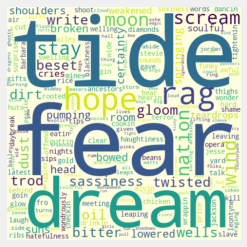

In [545]:
# Plotting these words with a word count
# First, creating a text list of all the words in column Words2 and setting these as string
texta = " ".join(review for review in New_Counta.Wordsa.astype(str))
texta

# Plotting the information with this wordcloud      
wordcloud = WordCloud(width=480, height=480, margin=0, background_color="lightyellow").generate(texta)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

With a count frequency of 1, positive words like dream, hope, moon, laugh appear in the word counts. But negative words like fear, bitter, scream, dirt, dust rag etc. appear, making the evaluation difficult.
Let's go on and analyse words with frequency 2, to have a better sentiment analysis.


history lies upset walk high falling take diggin back come pain ocean bringing shine get miss fine hour close earth heavens welcome rain men style mean mother go way smile wild alone dark show never breathe play man tell time lips hold stop bones job father soul oh wonderful son sail death failure know sleeping humbly say


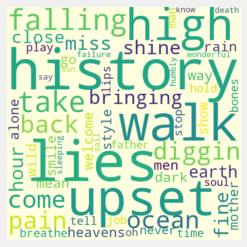

In [546]:
# Filtering only for the words, which frequency is 2
New_Countb = (df.loc[df['Counts'] == 2])
New_Countb

New_Countb.columns = ['Countsb', 'Wordsb']
New_Countb

# Plotting these words with a word count
# First, creating a text list of all the words in column Words2 and setting these as string
textb = " ".join(review for review in New_Countb.Wordsb.astype(str))
print(textb)

# Plotting the information with this wordcloud      
wordcloud = WordCloud(width=480, height=480, margin=0, background_color="lightyellow").generate(textb)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Here it is the overview of words, with a count frequency of 2. Positive words like shine, welcome and smile seem to be pushing towards positive feelings, but then words like lies, upset, pain, death, failure, push towards the negative sentiment. 
The analysis is still uncertain, let's move on now and analyse the rest of the words, with > 2 frequency.




In [547]:
# Filtering only for the words, which frequency is 2
New_Countc = (df.loc[df['Counts'] > 2 ])
New_Countc

New_Countc.columns = ['Countsc', 'Wordsc']
New_Countc



,Countsc,Wordsc
0,8.0,still
1,13.0,rise
2,6.0,may
10,17.0,like
16,3.0,cause
18,6.0,got
22,4.0,living
31,6.0,want
32,5.0,see
37,4.0,eyes


'The mode is bump'

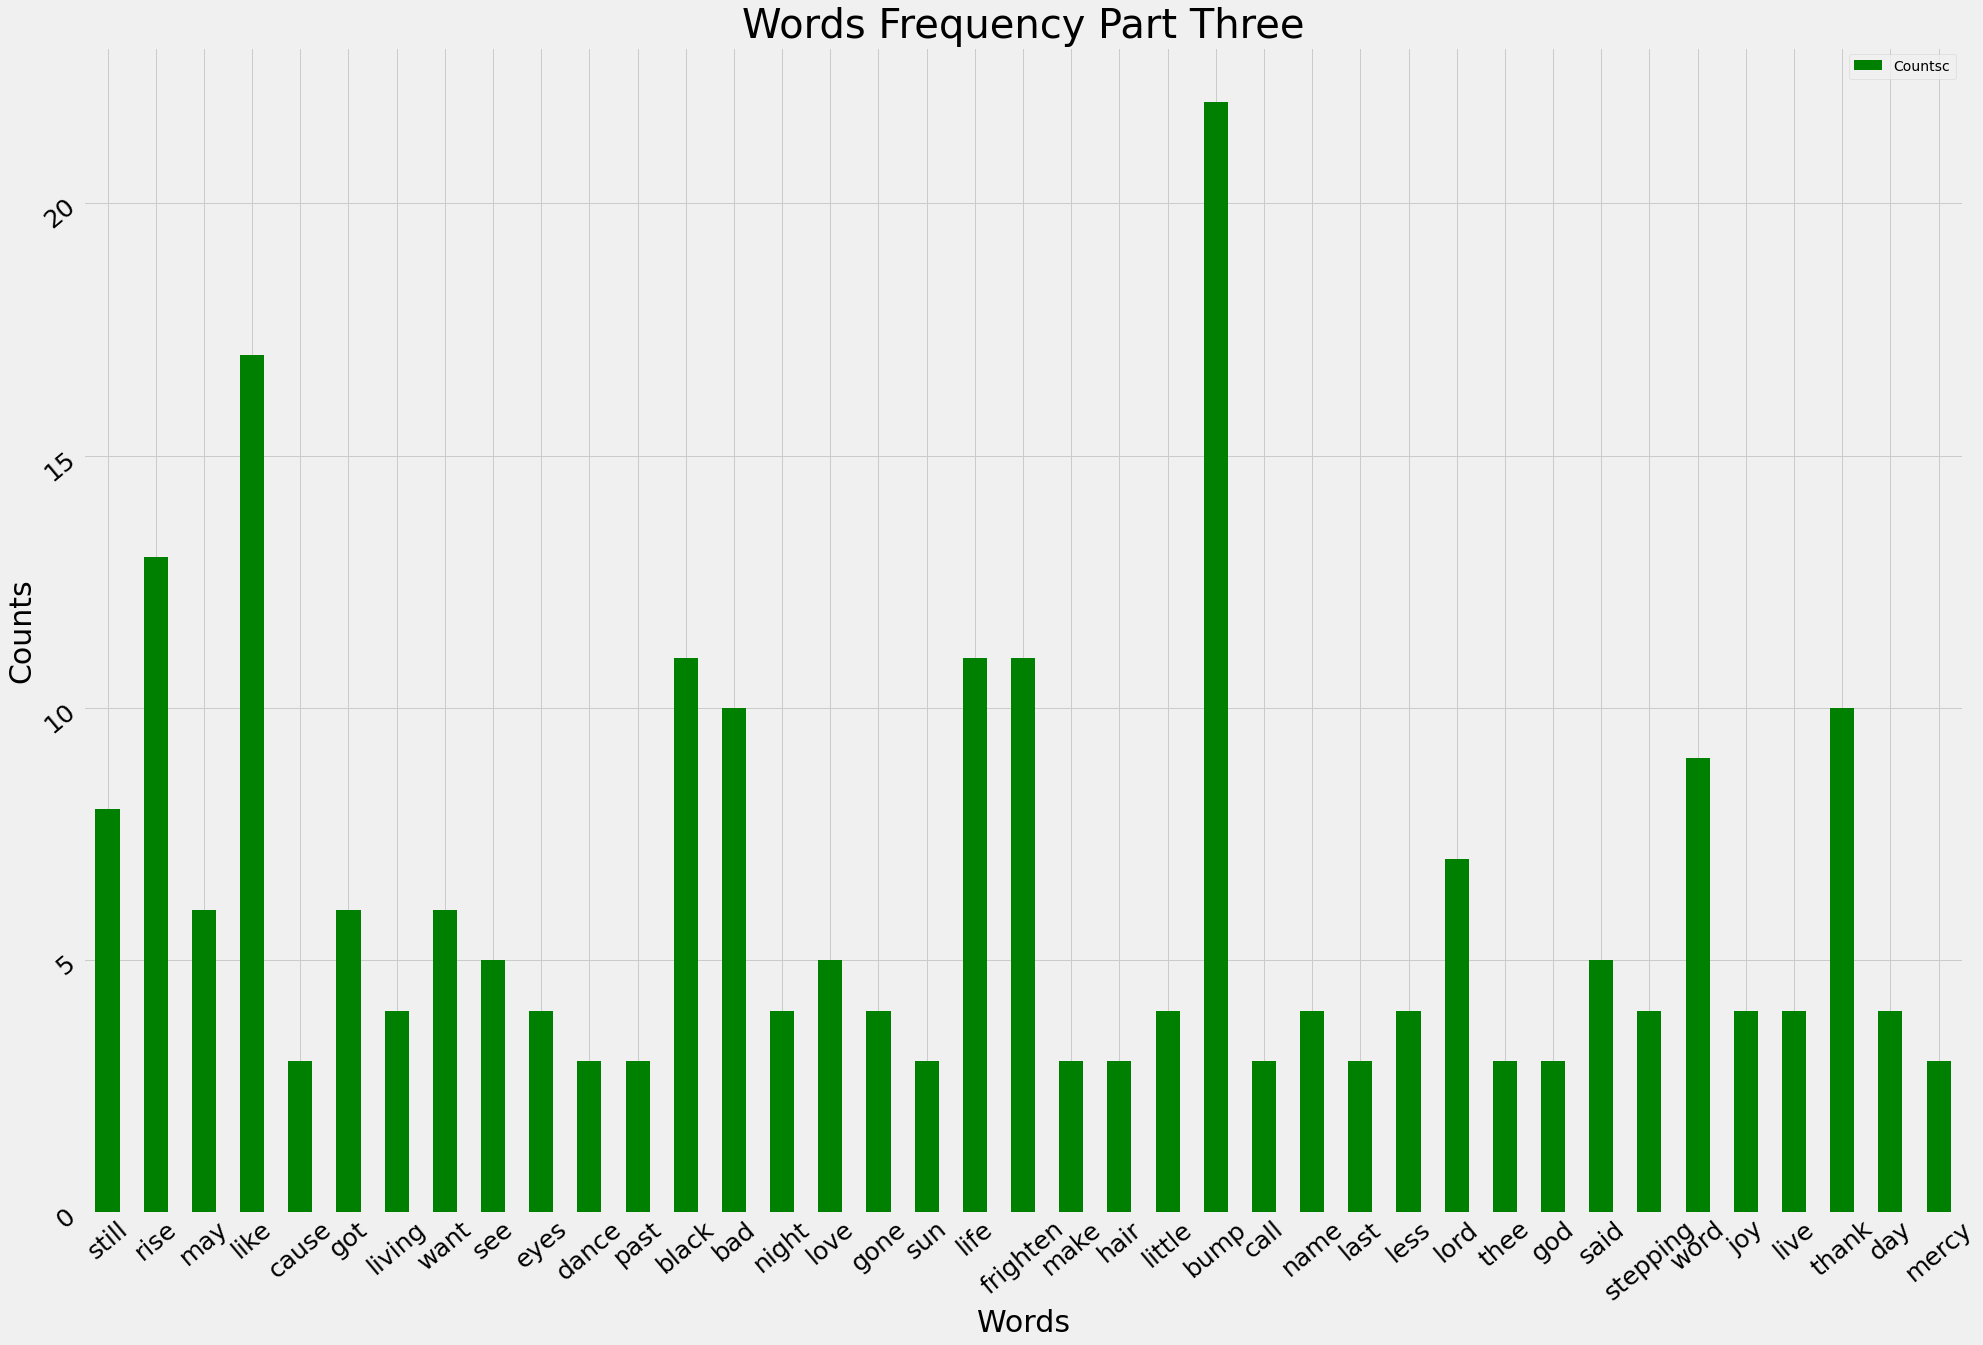

In [548]:
# Filtering only for the words, which frequency is 2
New_Countc = (df.loc[df['Counts'] >2 ])
New_Countc

New_Countc.columns = ['Countsc', 'Wordsc']
New_Countc

df5 = pd.DataFrame(New_Countc, columns = ['Countsc', 'Wordsc'])

# Substituting my id column with Words
df5.set_index('Wordsc', inplace=True)
df5

# Plotting my bar graph with a new style
matplotlib.style.use('fivethirtyeight') 
df5.plot(kind="bar", color=['green'], rot=0, fontsize=4, figsize=(30,20))

# setting labels
plt.xlabel('Words', size=30)
plt.title('Words Frequency Part Three', size=40)
plt.ylabel('Counts', size=30)
plt.tick_params(axis='both', which='major', labelsize=25, rotation=40)

# Mode is:
mode = ('The mode is bump')
mode

The horizontal bar chart shows that the words with the higher frequency are bump, like, still, rise, lord, black, life, frighten, thank, bad. There isn't a clear overview of only positive words or only negative words, unlike in the first 2 parts.
This may be due to the fact that Part Three reiterates the themes in Part One and emphasizes the strength she finds in herself and in her community, despite of the hardships of the black community. In fact, in this collection, poems like "Still I Rise" or "Ain't That Bad?" and "Life Doesn't Frighten Me" which depicts the strength, resilience of the black community and celebrate black lives and experiences.
On the other hand, poems like "In Retrospect" which depicts the depressing season changes and loneliness or "On Aging" about aging and its effect on body and soul.


Finally plotting the words into a wordcount with a shape appropriate to part three.


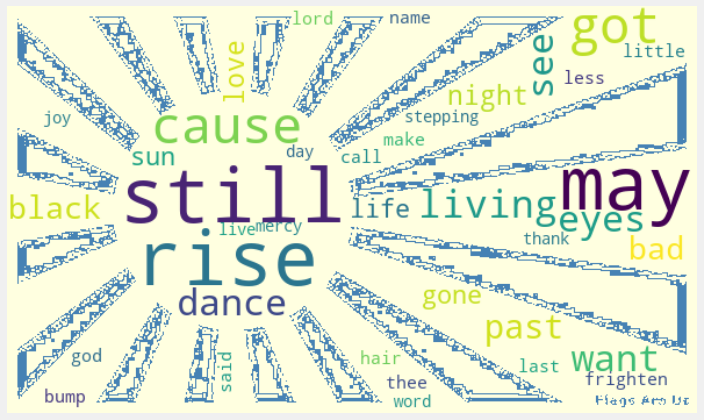

In [549]:
# Plotting these words with a word count whitin a shape
# First, creating a text list of all the words in column Words3 and setting these as string
textc = " ".join(review for review in New_Countc.Wordsc.astype(str))
textc

# Let's express these sentiments with a shaped image

# Creating my mask
mask = np.array(Image.open("Rise.jpg"))
mask

# Using wordcloud with white background and setting image countour
wc = WordCloud(background_color='lightyellow', mask=mask, mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='steelblue')

# Generating and showing this wc
wc.generate(textc)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()




In regards to strength and resilience, I wanted to conclude this coursework, by analysing the poem with more success withing this collection: "Still I Rise".



In [550]:
# Selecting the poem from the whole part three ( Copy1 & 2 of part three have been created)
# First showing the whole part three as lines
with open ('PART THREE-Copy1.txt', 'r',  encoding='utf-8') as myfile:  
    for myline in myfile:              
        print(myline)
        
# Getting the lines numbers with enumerate
with open('PART THREE-Copy1.txt', 'r', encoding='utf-8') as f:
    for i, line in enumerate(f, start=0):
        print('{} = {}'.format(i, line.strip()))
        


PART THREE - AND STILL I RISE



1

Still I Rise

 

 You may write me down in history

 With your bitter, twisted lies,

 You may trod me in the very dirt

 But still, like dust, I’ll rise.



 Does my sassiness upset you?

 Why are you beset with gloom?

 ’Cause I walk like I’ve got oil wells

 Pumping in my living room.



 Just like moons and like suns,

 With the certainty of tides,

 Just like hopes springing high,

 Still I’ll rise.



 Did you want to see me broken?

 Bowed head and lowered eyes?

 Shoulders falling down like teardrops,

 Weakened by my soulful cries.



 Does my haughtiness offend you?

 Don’t you take it awful hard

 ’Cause I laugh like I’ve got gold mines

 Diggin’ in my own back yard.



 You may shoot me with your words,

 You may cut me with your eyes,

 You may kill me with your hatefulness,

 But still, like air, I’ll rise.



 Does my sexiness upset you?

 Does it come as a surprise

 That I dance like I’ve got diamonds

 At the meeting of my thighs?



In [551]:
# DEAR READER, TO DO THE FOLLOWING PART YOURSELF, PLEASE CREATE A COPY OF PART THREE YOURSELF AND RUN THIS CODE WITH THIS COPY.
### as the code will replace the original version of the copy with my newly created file!!

# Now I need to basically, delete the lines from 57 = 2 to line 379 = I want to thank You.
# Importing necessary library
import os 

# Defining my delete multiple lines function
def delete_multiple_lines(original_file, line_numbers):
    
    is_skipped = False
    counter = 0
    # Create name of dummy / temporary file
    dummy_file = 'PART THREE-Copy2.txt' + '.bak'
    # Open original file in read only mode and dummy file in write mode
    with open('PART THREE-Copy2.txt', 'r') as read_obj, open(dummy_file, 'w') as write_obj:
        # Line by line copy data from original file to dummy file
        for line in read_obj:
            # If current line number exist in list then skip copying that line
            if counter not in line_numbers:
                write_obj.write(line)
            else:
                is_skipped = True
            counter += 1

  # If any line is skipped then rename dummy file as original file
    if is_skipped:
        os.remove('PART THREE-Copy2.txt')
        os.rename(dummy_file, 'PART THREE-Copy2.txt')
    else:
        os.remove(dummy_file)


# Creating line numbers from 57 to 379 with a loop
line_numbers = [i for i in range(57,379)]
line_numbers

line_numbers = list(range(57,379))
line_numbers

# Proceeding to delete the lines I do not need from my file
delete_multiple_lines('PART THREE-Copy2.txt', line_numbers)



In [552]:
# This is the outcome I wanted! Only the first poem "Still I Rise" is left from my file.
with open ('PART THREE-Copy2.txt', 'r') as myfile:  
    for myline in myfile:              
        print(myline)

PART THREE - AND STILL I RISE



1

Still I Rise

 

 You may write me down in history

 With your bitter, twisted lies,

 You may trod me in the very dirt

 But still, like dust, I’ll rise.



 Does my sassiness upset you?

 Why are you beset with gloom?

 ’Cause I walk like I’ve got oil wells

 Pumping in my living room.



 Just like moons and like suns,

 With the certainty of tides,

 Just like hopes springing high,

 Still I’ll rise.



 Did you want to see me broken?

 Bowed head and lowered eyes?

 Shoulders falling down like teardrops,

 Weakened by my soulful cries.



 Does my haughtiness offend you?

 Don’t you take it awful hard

 ’Cause I laugh like I’ve got gold mines

 Diggin’ in my own back yard.



 You may shoot me with your words,

 You may cut me with your eyes,

 You may kill me with your hatefulness,

 But still, like air, I’ll rise.



 Does my sexiness upset you?

 Does it come as a surprise

 That I dance like I’ve got diamonds

 At the meeting of my thighs?



Now that I have only poem 1, "Still I Rise" let's produce our sentiment analysis on this. I will be using vader.

In [553]:
 # Installing Vader for the sentiment analysis and importing the necessary libraries
%pip install vaderSentiment
    
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
  
# Building the unction to print sentiments of each sentence of the poem
def sentiment_scores(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
      
    print("Overall sentiment dictionary is : ", sentiment_dict) 
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
  
    print("Sentence Overall Rated As", end = " ") 
  
    # decide sentiment as positive, negative and neutral 
    if sentiment_dict['compound'] >= 0.05 : 
        print("Positive") 
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        print("Negative") 
  
    else : 
        print("Neutral") 
  


 # Calculating the sentiment score for each sentence
if __name__ == "__main__" : 
  
    print("\n1st statement :") 
    sentence = "You may write me down in history" 
  
    # Function calling part
    sentiment_scores(sentence) 
  
    print("\n2nd Statement :") 
    sentence = "With your bitter, twisted lies,"
    sentiment_scores(sentence) 
  
    print("\n3rd Statement :") 
    sentence = " You may trod me in the very dirt."
    sentiment_scores(sentence) 
    
    print("\n4th Statement :") 
    sentence = "But still, like dust, I’ll rise."
    sentiment_scores(sentence) 
    
      
    print("\n5th Statement :") 
    sentence = "Does my sassiness upset you?"
    sentiment_scores(sentence) 
  
    print("\n6th Statement :") 
    sentence = "Why are you beset with gloom?"
    sentiment_scores(sentence) 
    
    print("\n7th Statement :") 
    sentence = "’Cause I walk like I’ve got oil wells"
    sentiment_scores(sentence) 
    
    print("\n8th Statement :") 
    sentence = "Pumping in my living room."
    sentiment_scores(sentence) 
    
    
    print("\n9th Statement :") 
    sentence = "Just like moons and like suns,"
    sentiment_scores(sentence) 
  
    print("\n10th Statement :") 
    sentence = "With the certainty of tides,"
    sentiment_scores(sentence) 
    
    print("\n11th Statement :") 
    sentence = "Just like hopes springing high,"
    sentiment_scores(sentence) 
    
    print("\n12th Statement :") 
    sentence = "Still I’ll rise."
    sentiment_scores(sentence) 
    
    
    print("\n13th Statement :") 
    sentence = "Did you want to see me broken?"
    sentiment_scores(sentence) 
  
    print("\n14th Statement :") 
    sentence = "Bowed head and lowered eyes?"
    sentiment_scores(sentence) 
    
    print("\n15th Statement :") 
    sentence = "Shoulders falling down like teardrops,"
    sentiment_scores(sentence) 
    
    print("\n16th Statement :") 
    sentence = "Weakened by my soulful cries."
    sentiment_scores(sentence) 
    
    
    print("\n17th Statement :") 
    sentence = "Does my haughtiness offend you?"
    sentiment_scores(sentence) 
  
    print("\n18th Statement :") 
    sentence = "Don’t you take it awful hard"
    sentiment_scores(sentence) 
    
    print("\n19th Statement :") 
    sentence = "’Cause I laugh like I’ve got gold mines"
    sentiment_scores(sentence) 
    
    print("\n20th Statement :") 
    sentence = " Diggin’ in my own back yard."
    sentiment_scores(sentence) 
    

    print("\n21st Statement :") 
    sentence = "You may shoot me with your words,"
    sentiment_scores(sentence) 
  
    print("\n22nd Statement :") 
    sentence = "You may cut me with your eyes,"
    sentiment_scores(sentence) 
    
    print("\n23th Statement :") 
    sentence = "You may kill me with your hatefulness,"
    sentiment_scores(sentence) 
    
    print("\n24th Statement :") 
    sentence = "But still, like air, I’ll rise."
    sentiment_scores(sentence) 


    print("\n25th Statement :") 
    sentence = "Does my sexiness upset you?"
    sentiment_scores(sentence) 
  
    print("\n26th Statement :") 
    sentence = "Does it come as a surprise"
    sentiment_scores(sentence) 
    
    print("\n27th Statement :") 
    sentence = "That I dance like I’ve got diamonds"
    sentiment_scores(sentence) 
    
    print("\n28th Statement :") 
    sentence = "At the meeting of my thighs?"
    sentiment_scores(sentence) 


    print("\n29th Statement :") 
    sentence = "Out of the huts of history’s shame"
    sentiment_scores(sentence) 
  
    print("\n30th Statement :") 
    sentence = "I rise"
    sentiment_scores(sentence) 
    
    print("\n31st Statement :") 
    sentence = "Up from a past that’s rooted in pain"
    sentiment_scores(sentence) 
    
    print("\n32nd Statement :") 
    sentence = "I rise"
    sentiment_scores(sentence) 


    print("\n33th Statement :") 
    sentence = "I’m a black ocean, leaping and wide,"
    sentiment_scores(sentence) 
    
    print("\n34th Statement :") 
    sentence = "Welling and swelling I bear in the tide."
    sentiment_scores(sentence) 

 
    print("\n35th Statement :") 
    sentence = "Leaving behind nights of terror and fear"
    sentiment_scores(sentence) 
  
    print("\n36th Statement :") 
    sentence = "I rise"
    sentiment_scores(sentence) 
    
    print("\n37th Statement :") 
    sentence = "Into a daybreak that’s wondrously clear"
    sentiment_scores(sentence) 
    
    print("\n38th Statement :") 
    sentence = "I rise"
    sentiment_scores(sentence) 


    print("\n39th Statement :") 
    sentence = "Bringing the gifts that my ancestors gave,"
    sentiment_scores(sentence) 
    
    print("\n40th Statement :") 
    sentence = "I am the dream and the hope of the slave."
    sentiment_scores(sentence) 

 
    print("\n41st Statement :") 
    sentence = "I rise"
    sentiment_scores(sentence) 
    
    print("\n42nd Statement :") 
    sentence = "I rise"
    sentiment_scores(sentence) 

    
    print("\n43rd Statement :") 
    sentence = "I rise"
    sentiment_scores(sentence) 


    

Note: you may need to restart the kernel to use updated packages.

1st statement :
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Neutral

2nd Statement :
Overall sentiment dictionary is :  {'neg': 0.651, 'neu': 0.349, 'pos': 0.0, 'compound': -0.6808}
sentence was rated as  65.10000000000001 % Negative
sentence was rated as  34.9 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Negative

3rd Statement :
Overall sentiment dictionary is :  {'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'compound': -0.4005}
sentence was rated as  27.800000000000004 % Negative
sentence was rated as  72.2 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Negative

4th Statement :
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.5023}
sentence wa

Out of this analysis, the count of the sentences’ sentiment is as follows:

Negative = 16
Neutral = 14
Positive = 13

According to this analysis, there is more negative sentiment than positive (16 sentences against 13) and the neutral sentences are 14.
Overall, the poems will be rated as Negative. But we all know that this is not the case.
Let's evaluate the words frequencies.


In [554]:
# Continuing with Part Three of the Collection: "And Still I Rise"
f = open("PART THREE-Copy2.txt", 'r')

data4 = f.read()

f.close()

#I removed backspaces, with:
words = data4.lower().replace("\n", " ").split(" ") 

#I removed the relevant punctuation with regex
clean_text4 = re.sub(r'[^\w\s]', "", str(words)).split(" ")
print(clean_text4)
print("Number of words of raw text", len(clean_text4))





['part', 'three', '', 'and', 'still', 'i', 'rise', '', '1', 'still', 'i', 'rise', '', '', '', 'you', 'may', 'write', 'me', 'down', 'in', 'history', '', 'with', 'your', 'bitter', 'twisted', 'lies', '', 'you', 'may', 'trod', 'me', 'in', 'the', 'very', 'dirt', '', 'but', 'still', 'like', 'dust', 'ill', 'rise', '', '', 'does', 'my', 'sassiness', 'upset', 'you', '', 'why', 'are', 'you', 'beset', 'with', 'gloom', '', 'cause', 'i', 'walk', 'like', 'ive', 'got', 'oil', 'wells', '', 'pumping', 'in', 'my', 'living', 'room', '', '', 'just', 'like', 'moons', 'and', 'like', 'suns', '', 'with', 'the', 'certainty', 'of', 'tides', '', 'just', 'like', 'hopes', 'springing', 'high', '', 'still', 'ill', 'rise', '', '', 'did', 'you', 'want', 'to', 'see', 'me', 'broken', '', 'bowed', 'head', 'and', 'lowered', 'eyes', '', 'shoulders', 'falling', 'down', 'like', 'teardrops', '', 'weakened', 'by', 'my', 'soulful', 'cries', '', '', 'does', 'my', 'haughtiness', 'offend', 'you', '', 'dont', 'you', 'take', 'it', '

In [555]:
#Let's use numpy to list all the words in the sonnet 
e = np.array(list(clean_text4))

# Let's use nltk to show better the occurances of the words
text = e

freq = nltk.FreqDist(text)

# Let's show these in a cleaner way
for key,val in freq.items():
    print(str(val) + " " + str(key))

1 part
1 three
57 
7 and
5 still
14 i
12 rise
1 1
11 you
5 may
1 write
6 me
2 down
6 in
1 history
6 with
4 your
1 bitter
1 twisted
1 lies
1 trod
9 the
1 very
1 dirt
2 but
9 like
1 dust
3 ill
4 does
8 my
1 sassiness
2 upset
1 why
1 are
1 beset
1 gloom
2 cause
1 walk
3 ive
3 got
1 oil
1 wells
1 pumping
1 living
1 room
2 just
1 moons
1 suns
1 certainty
6 of
1 tides
1 hopes
1 springing
1 high
1 did
1 want
1 to
1 see
1 broken
1 bowed
1 head
1 lowered
2 eyes
1 shoulders
1 falling
1 teardrops
1 weakened
1 by
1 soulful
1 cries
1 haughtiness
1 offend
1 dont
1 take
2 it
1 awful
1 hard
1 laugh
1 gold
1 mines
1 diggin
1 own
1 back
1 yard
1 shoot
1 words
1 cut
1 kill
1 hatefulness
1 air
1 sexiness
1 come
1 as
4 a
1 surprise
2 that
1 dance
1 diamonds
1 at
1 meeting
1 thighs
1 out
1 huts
1 historys
1 shame
1 up
1 from
1 past
2 thats
1 rooted
1 pain
1 im
1 black
1 ocean
1 leaping
1 wide
1 welling
1 swelling
1 bear
1 tide
1 leaving
1 behind
1 nights
1 terror
1 fear
1 into
1 daybreak
1 wondrously
1 clea

In [556]:
# Cleaning text of punctuation, without using the .split function
Nopunct_text4 = re.sub(r'[^a-zA-Z]', " ", str(words))

#tokenizing my text
text_tokens4 = word_tokenize(Nopunct_text4)

#removing stopwords from my text (from the updated stopword list)
tokens_without_sw4 = [word for word in text_tokens4 if not word in new_stopwords]

e = np.array(list(tokens_without_sw4))
text4 = e
e

freq = nltk.FreqDist(text4)


for key,val in freq.items():
    print(str(val) + " " + str(key))


1 three
5 still
12 rise
5 may
1 write
2 history
1 bitter
1 twisted
1 lies
1 trod
1 dirt
9 like
1 dust
1 sassiness
2 upset
1 beset
1 gloom
2 cause
1 walk
3 got
1 oil
1 wells
1 pumping
1 living
1 room
1 moons
1 suns
1 certainty
1 tides
1 hopes
1 springing
1 high
1 want
1 see
1 broken
1 bowed
1 head
1 lowered
2 eyes
1 shoulders
1 falling
1 teardrops
1 weakened
1 soulful
1 cries
1 haughtiness
1 offend
1 take
1 awful
1 hard
1 laugh
1 gold
1 mines
1 diggin
1 back
1 yard
1 shoot
1 words
1 cut
1 kill
1 hatefulness
1 air
1 sexiness
1 come
1 surprise
1 dance
1 diamonds
1 meeting
1 thighs
1 huts
1 shame
1 past
1 rooted
1 pain
1 black
1 ocean
1 leaping
1 wide
1 welling
1 swelling
1 bear
1 tide
1 leaving
1 behind
1 nights
1 terror
1 fear
1 daybreak
1 wondrously
1 clear
1 bringing
1 gifts
1 ancestors
1 gave
1 dream
1 hope
1 slave


In [557]:
# I've imported the results above into an excel. Now reading the excel into this notebook
df = pd.read_excel('Still I Rise Word Frequency.xlsx',
                   usecols= [0])

# Naming the column
df.columns = ['Word Frequency']
df.head()

# Splitting numbers from words into 2 columns
Word_Frequency = df['Word Frequency'].str.split(' ',expand=True)
Word_Frequency

# Naming these 2 columns
Word_Frequency.columns = ['Count', 'Word']
Word_Frequency


# Creating a dataframe with these 2 columns
df = pd.DataFrame(Word_Frequency, columns = ['Count', 'Word'])


# Setting the df types for each columns. Wasn't able to set counts as int.
df['Count']= df['Count'].astype('int')
df['Word']= df['Word'].astype('category')
df




,Count,Word
0,5,still
1,12,rise
2,5,May
3,1,write
4,2,history
...,...,...
91,1,ancestors
92,1,gave
93,1,dream
94,1,hope


'The mode is rise'

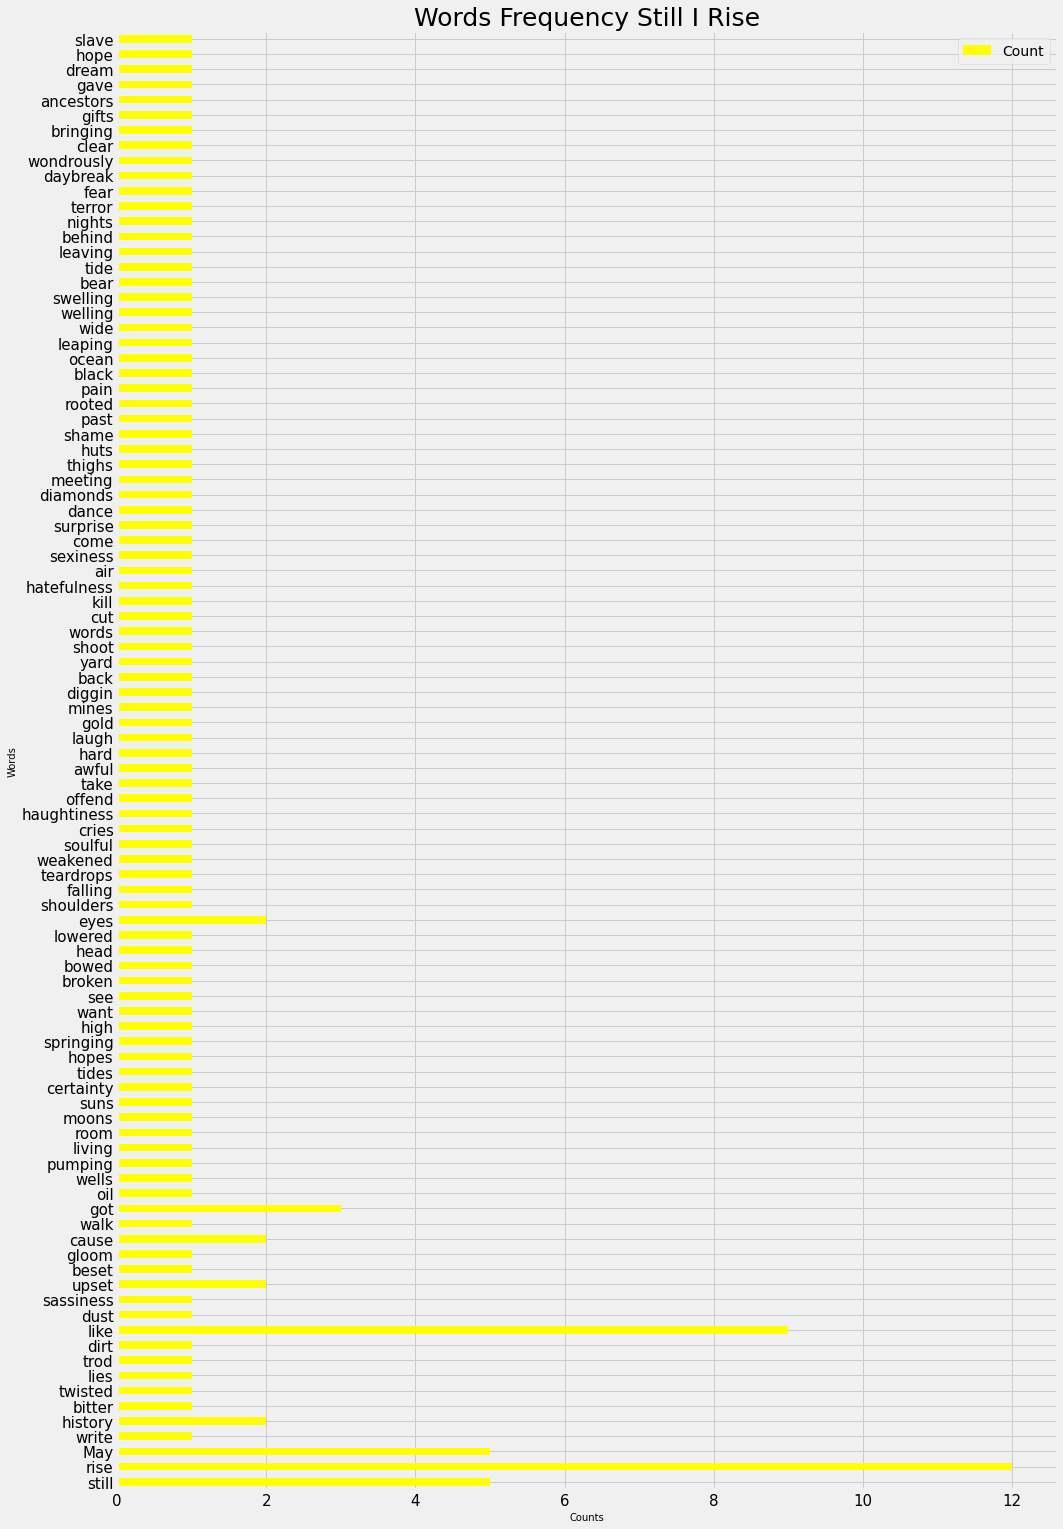

In [558]:
dfx = pd.DataFrame(df)
dfx

# Substituting my id column with Words
dfx.set_index('Word', inplace=True)
dfx

# Plotting my bar graph with a new style
matplotlib.style.use('fivethirtyeight') 
dfx.plot(kind="barh", color=['yellow'], rot=0, fontsize=4, figsize=(15,25))

# setting labels
plt.xlabel('Counts', size=10)
plt.title('Words Frequency Still I Rise', size=25)
plt.ylabel('Words', size=10)
plt.tick_params(axis='both', which='major', labelsize=15)

# Mode is:
mode = ('The mode is rise')
mode





The most repeated words are rise, like, still, May, got, etc. Words like hope, dream, dance, surprise, laugh gives a positive sentiment general overlook to the analysis, but then words like slave, bitter, upset, gloom, weakened, cries etc. give a negative out look to the list.
The poem it encourages readers to love themselves fully and persevere in the face of every hardship. Is a celebration of strength and resilience even during unhappy life experiences.
The mix of negative and positive words, explain just that: hardships vs resilience.

Finally plotting the words into a wordcloud with a shape appropriate to this poem.


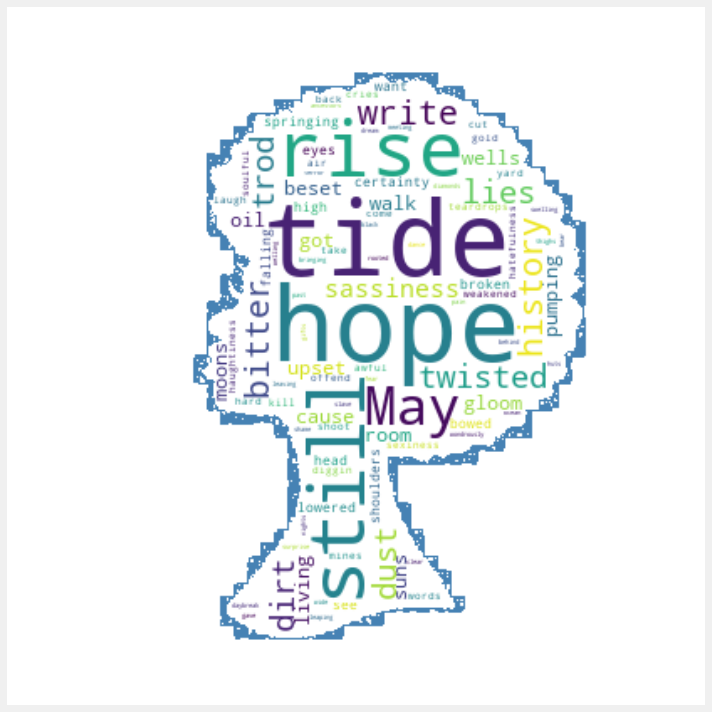

In [559]:
# Defining the test as column Word of initial df
texte = " ".join(review for review in Word_Frequency.Word.astype(str))
texte

# Let's express these sentiments with a shaped image
# Creating my mask
mask = np.array(Image.open("Afro.jpg"))
mask

# Using wordcloud with white background and setting image countour
wc = WordCloud(background_color='white', mask=mask, mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='steelblue')

# Generating and showing this wc
wc.generate(texte)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()


SUMMARY / CONCLUSION

We have first of all created summaries of the author's biography by using 2 methods to get a comprehensive summary from the original texts. We've seen how the first method was more accurate and informative.

We've then analysed the three main parts of the collection, by analysing word frequencies to get the general positive or negative emotion behind them. Through Word clouds and bar charts, the analysis has highlighted how part one is generally positive and confirm the fact that Part One, actually has been called "joyful”.

Part two is generally negative and the changes in words’ sentiments have been notable both in the word cloud and bar chart, accordingly to the negative themes discussed within part two: words like slave, murder, dark, deceit, flesh, bone, smacking and so on confirms the focus on the hardships in the Old South, that the author and black people have experienced. 

Lastly, for part three, the outcome of the analysis has been unclear compared to the first 2 parts: there isn't a clear overview of only positive words or only negative words.


We have finally proceeded into making a sentiment analysis with verder for the poem “Still I Rise”, part of the third part of the collection. We've seen that the sentiment analysis came out negative with this method and the frequency of the words’ analysis came out unclear: a mix of positive and negative sentiments. As the poem it encourages readers to love themselves fully and persevere in the face of every hardship, is a mix of negative and positive words.






WEAKNESSES

The word frequency analysis is not 100% reliable
Neutral words like ‘eyes’ or ‘dream’ do not provide a negative or positive sentiment, unless they are put within the context of the sentence.
So, it is difficult to understand whether some words convey positive or negative meaning to start with.

Furthermore, by already knowing the context of the poems, is easier to spot the sentiment.
In the event we do not know the themes present in the text to analyse, this method could not be very significative.
Another issue is that for larger databases, the word frequency analysis may be inefficient as it would be harder to spot the general sentiment with a very big bar chart with similar words frequencies: in these cases, a sentiment analysis like the one done with vander, may be more appropriate.
At the same time, as we've seen, sentiment analysis with vander is not precise either.
The difficulty with this type of analysis, lays in the difficulties that exist in analysing language: the way a word or sentence is interpreted, may be inaccurately interpreted by python and sometimes may be interpreted subjectively by humans.
Especially if there is ambiguity within the word and context.
The analysis is good for short and clear meaningful texts.
Solutions to these issues could be to create machine learning models for subsets of the data.



